In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics
from sklearn.metrics import accuracy_score

In [43]:
names = ['Date','Time','Measurement','Value']
df = pd.read_csv('Diabetes-Data/data-08', sep='\t', header=None, names=names)
df

,Date,Time,Measurement,Value
0,07-31-1990,12:09,60,100
1,07-31-1990,17:28,62,190
2,07-31-1990,18:41,62,124
3,08-01-1990,05:58,58,222
4,08-01-1990,12:57,60,339
...,...,...,...,...
172,09-04-1990,12:15,57,160
173,09-04-1990,12:16,57,139
174,09-04-1990,15:04,61,291
175,09-04-1990,19:06,62,124


In [44]:
arr_triplets = []

m = []
for index, row in enumerate(df.iterrows()):
    if(row[1]['Measurement'] >= 58 and row[1]['Measurement'] <= 64):
        if(len(m) < 3):
            m.append(row[1]['Value'])
        else:
            arr_triplets.append({'m1':m[0], 'm2':m[1], 'm3':m[2], 'Symptoms':False })
            m.append(row[1]['Value'])
            m.pop(0)
    elif(row[1]['Measurement'] == 65 and len(m) == 3):
        arr_triplets.append({'m1':m[0], 'm2':m[1], 'm3':m[2], 'Symptoms':True})
            

In [45]:
df_hg = pd.DataFrame(arr_triplets)
df_hg.iloc[5:30][:]

,m1,m2,m3,Symptoms
5,71,72,193,True
6,71,72,193,False
7,72,193,57,False
8,193,57,240,False
9,57,240,236,False
10,240,236,224,False
11,236,224,121,True
12,236,224,121,False
13,224,121,73,False
14,121,73,83,False


<function matplotlib.pyplot.show(*args, **kw)>

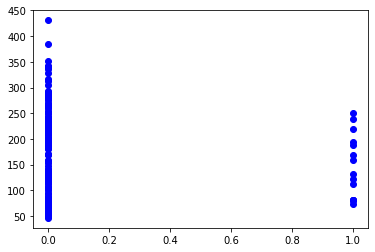

In [46]:
plt.plot(df_hg['Symptoms'], df_hg['m3'], 'bo')
plt.show

In [108]:
X = pd.DataFrame(df_hg.loc[:,'m1':'m3'])
y = pd.DataFrame(df_hg.loc[:,'Symptoms'])

#Default size of trainData = 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [109]:
BernNB = BernoulliNB()
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print (accuracy_score(y_expect, y_pred))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
0.8611111111111112


/home/saul/actividad1_aprendizaje/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [110]:
print(BernNB.predict([[2, 2, 2]]))

[False]
